In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets, ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [40]:
# Read the CSV file
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analytics/modified_data_no_date.csv")#KAAN'S Folder

In [41]:
cols = list(df.columns.values)
cols = ['MO','YR','MaxTemp','MinTemp','MeanTemp','ELEV','Latitude','Longitude','Snowfall','Precip']
df=df[cols]
df

,MO,YR,MaxTemp,MinTemp,MeanTemp,ELEV,Latitude,Longitude,Snowfall,Precip
0,7,42,25.555556,22.222222,23.888889,62,5.600000,-0.300000,0.0,1.016
1,7,42,28.888889,21.666667,25.555556,62,5.600000,-0.300000,0.0,0.000
2,7,42,26.111111,22.222222,24.444444,62,5.600000,-0.300000,0.0,2.540
3,7,42,26.666667,22.222222,24.444444,62,5.600000,-0.300000,0.0,2.540
4,7,42,26.666667,21.666667,24.444444,62,5.600000,-0.300000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
117828,12,45,28.333333,18.333333,23.333333,2,-27.433333,153.133333,0.0,0.000
117829,12,45,29.444444,18.333333,23.888889,2,-27.433333,153.133333,0.0,9.906
117830,12,45,28.333333,18.333333,23.333333,2,-27.433333,153.133333,0.0,0.000
117831,12,45,28.333333,18.333333,23.333333,2,-27.433333,153.133333,0.0,0.000


In [42]:
X_precip = df.iloc[:, 0:-1]
y_precip = df.iloc[:, -1]
cols = list(df.columns.values)
cols2 = ['MO','YR','MaxTemp','MinTemp','MeanTemp','ELEV','Latitude','Longitude','Precip','Snowfall']
df2=df[cols2]
X_snow = df2.iloc[:, 0:-1]
y_snow = df2.iloc[:, -1]

###ESTIMATION PRECIPITATION

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_precip, y_precip)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [44]:


precip = ensemble.GradientBoostingRegressor(**params)
precip.fit(X_train, y_train)
y_pred=precip.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Here is the score of model :",metrics.r2_score(y_test,y_pred))

The mean squared error (MSE) on test set: 88.5036
Here is the score of model : 0.18887482742280925


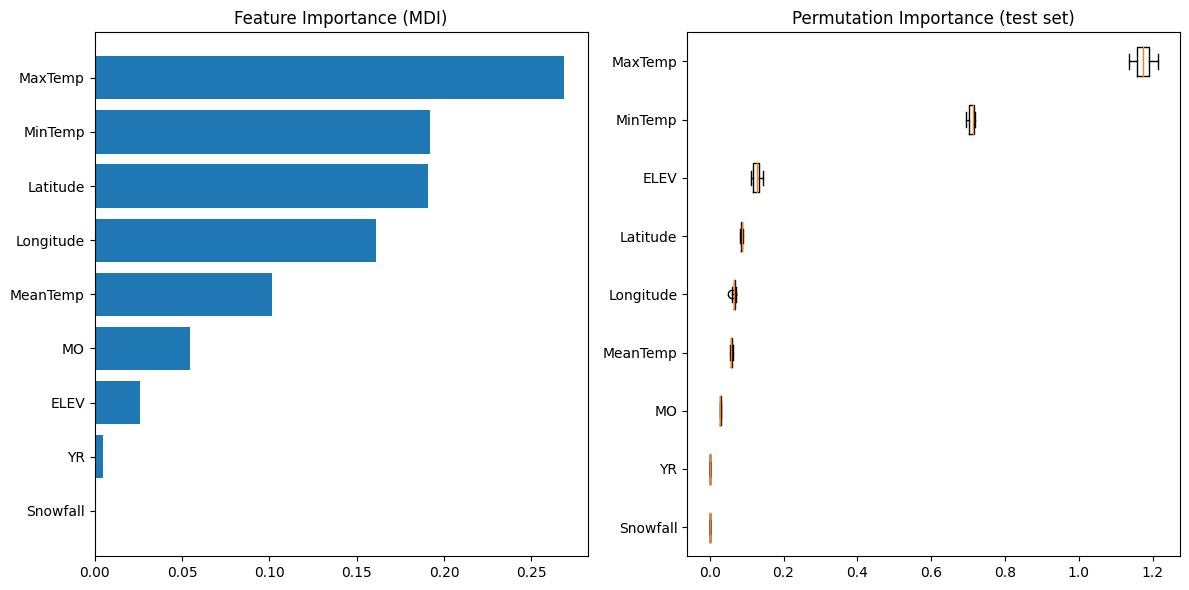

In [45]:
feature_importance = precip.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    precip, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


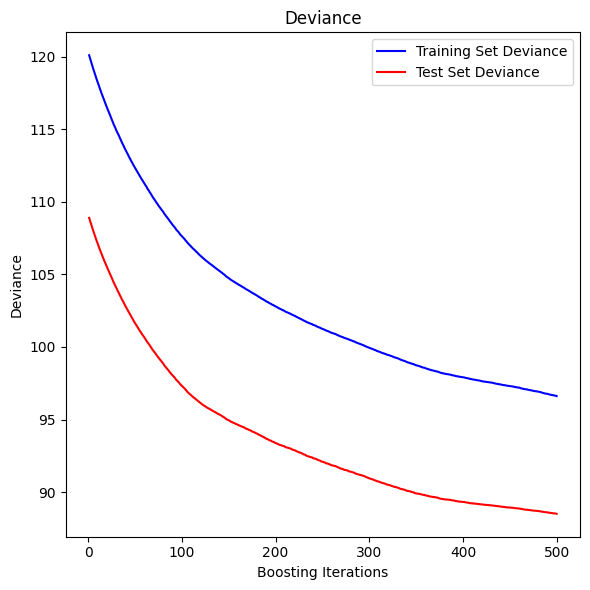

In [46]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(precip.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    precip.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

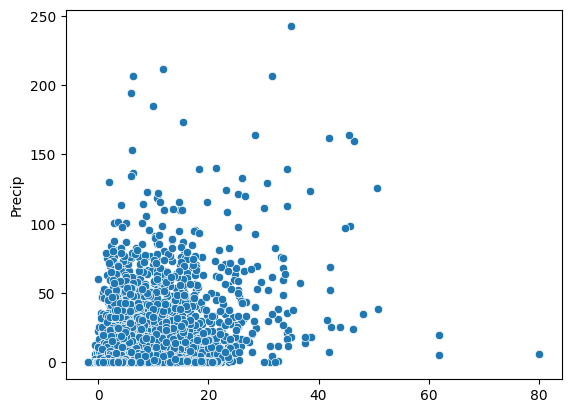

In [48]:
sns.scatterplot(x=precip.predict(X_test),y=y_test);

###SNOWFALL ESTIMATION 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_snow, y_snow)

In [50]:
snow = ensemble.GradientBoostingRegressor(**params)
snow.fit(X_train, y_train)

y_pred=snow.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

print("Here is the score of model :",metrics.r2_score(y_test,y_pred))

The mean squared error (MSE) on test set: 1.9065
Here is the score of model : 0.7319387531222163


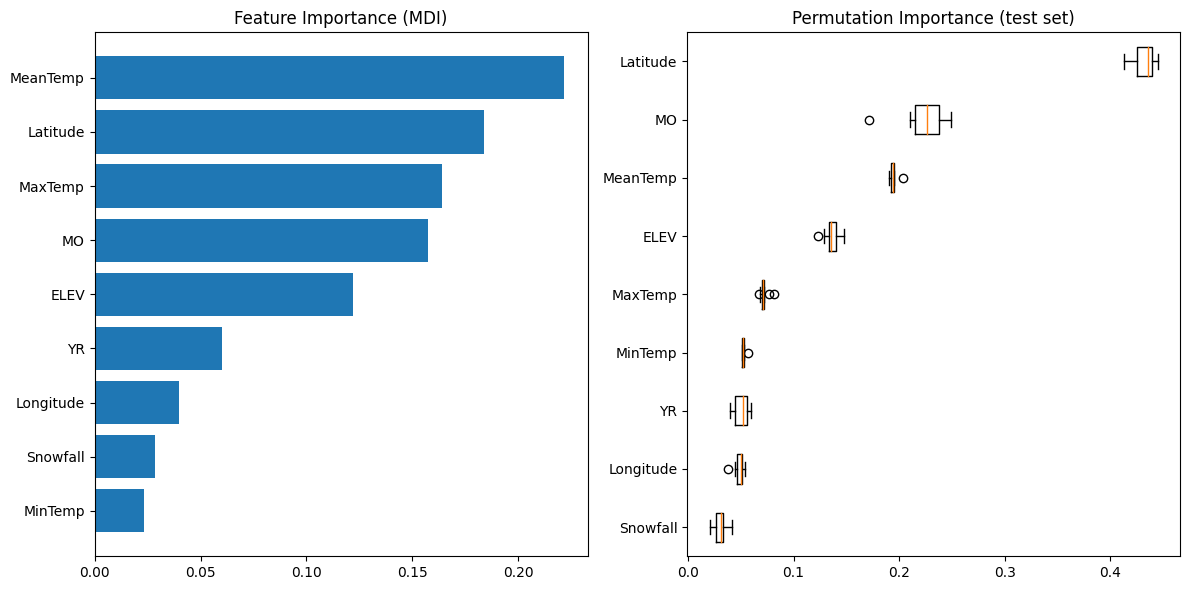

In [51]:
feature_importance = snow.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    snow, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


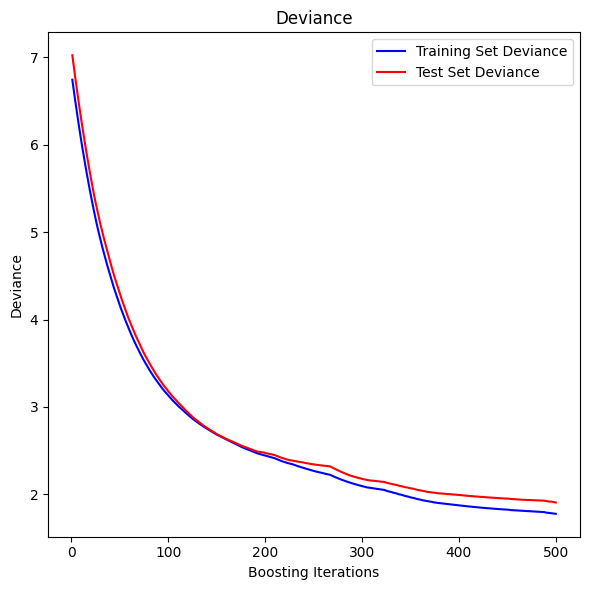

In [52]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(snow.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    snow.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

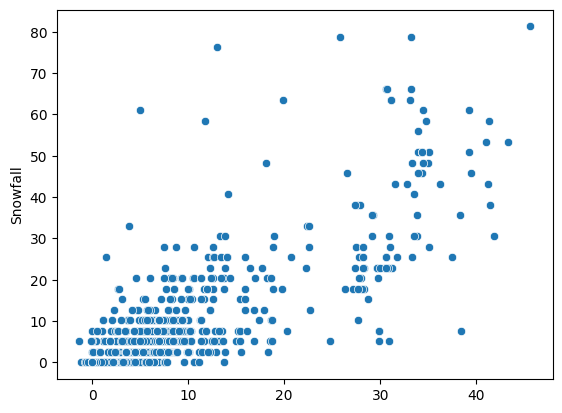

In [53]:
sns.scatterplot(x=snow.predict(X_test),y=y_test);

##BALANCED DATABASE

In [15]:
df_balance= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analytics/dataset_balanced_no_date.csv")#KAAN'S Folder

In [16]:
cols = list(df_balance.columns.values)
cols = ['MO','YR','MaxTemp','MinTemp','MeanTemp','ELEV','Latitude','Longitude','Snowfall','Precip']
df_balance=df_balance[cols]
df_balance

,MO,YR,MaxTemp,MinTemp,MeanTemp,ELEV,Latitude,Longitude,Snowfall,Precip
0,10,43,1.111111,-3.888889,-1.111111,62,60.683333,-46.633333,2.54,0.000
1,2,45,2.222222,-5.000000,-1.111111,62,60.683333,-46.633333,22.86,0.000
2,10,43,2.777778,-7.777778,-2.222222,11,61.183333,-45.366667,7.62,0.000
3,2,44,30.555556,25.000000,27.777778,50,-5.900000,-35.300000,0.00,0.000
4,2,43,-15.000000,-21.111111,-17.777778,50,67.016667,-50.700000,5.08,0.000
...,...,...,...,...,...,...,...,...,...,...
4281,7,44,32.777778,25.555556,28.888889,7,22.766667,88.366667,0.00,1.524
4282,4,45,-3.333333,-10.555556,-6.666667,62,60.683333,-46.633333,35.56,2.032
4283,3,43,-10.000000,-13.333333,-11.666667,50,67.016667,-50.700000,7.62,2.540
4284,11,42,-8.333333,-15.000000,-11.666667,50,67.016667,-50.700000,12.70,0.000


In [17]:
X_precip = df_balance.iloc[:, 0:-1]
y_precip = df_balance.iloc[:, -1]
cols = list(df_balance.columns.values)
cols2 = ['MO','YR','MaxTemp','MinTemp','MeanTemp','ELEV','Latitude','Longitude','Precip','Snowfall']
df2_balance=df_balance[cols2]
X_snow = df2_balance.iloc[:, 0:-1]
y_snow = df2_balance.iloc[:, -1]

###ESTIMATION PRECIPITATION

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_precip, y_precip)

In [19]:
precip = ensemble.GradientBoostingRegressor(**params)
precip.fit(X_train, y_train)

y_pred=precip.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

print("Here is the score of model :",metrics.r2_score(y_test,y_pred))

The mean squared error (MSE) on test set: 38.7763
Here is the accuracy of model : 0.1802627914132785


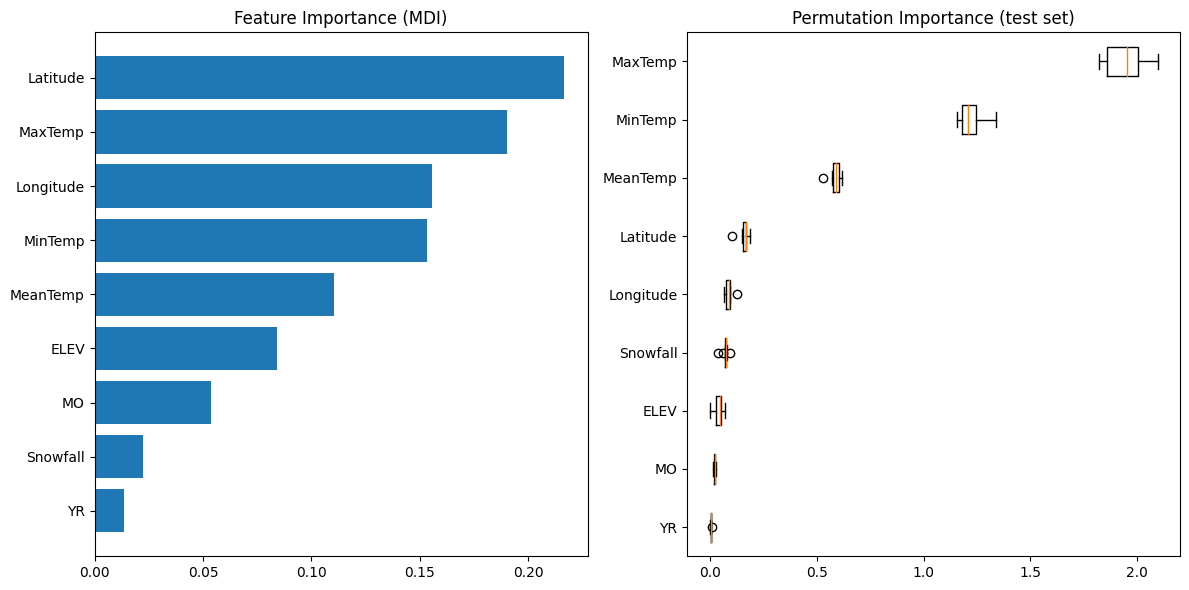

In [20]:
feature_importance = precip.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    precip, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


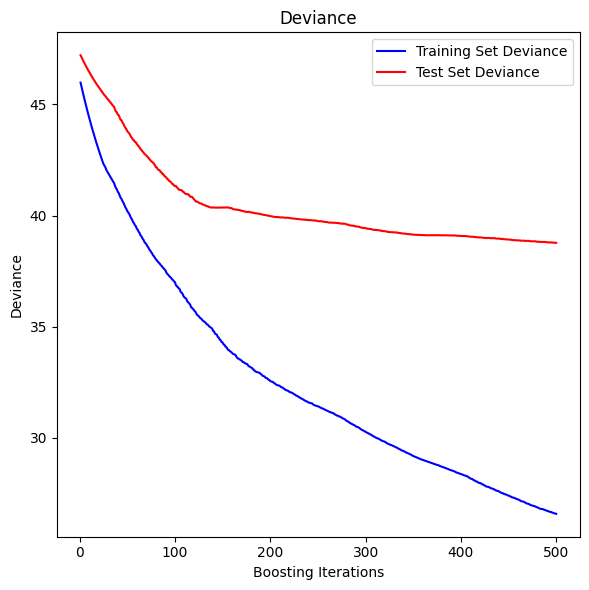

In [21]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(precip.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    precip.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(x=precip.predict(X_test),y=y_test);

###SNOWFALL ESTIMATION 

In [22]:


snow = ensemble.GradientBoostingRegressor(**params)
snow.fit(X_train, y_train)

y_pred=snow.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

print("Here is the score of model :",metrics.r2_score(y_test,y_pred))


The mean squared error (MSE) on test set: 38.7763
Here is the accuracy of model : 0.18026359867114705


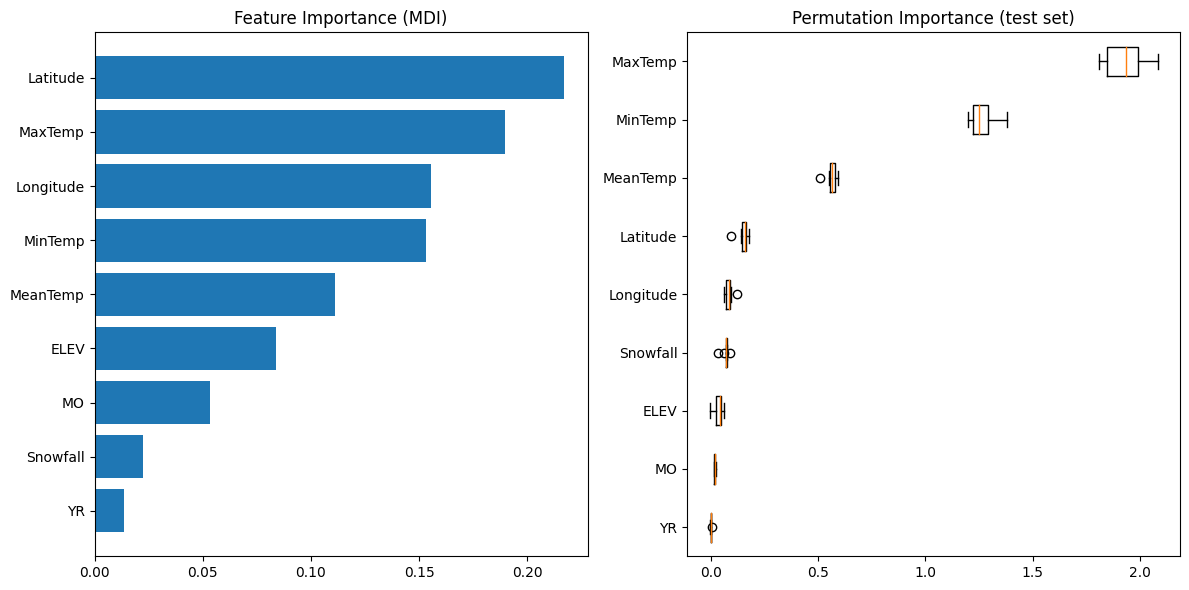

In [23]:
feature_importance = snow.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    snow, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


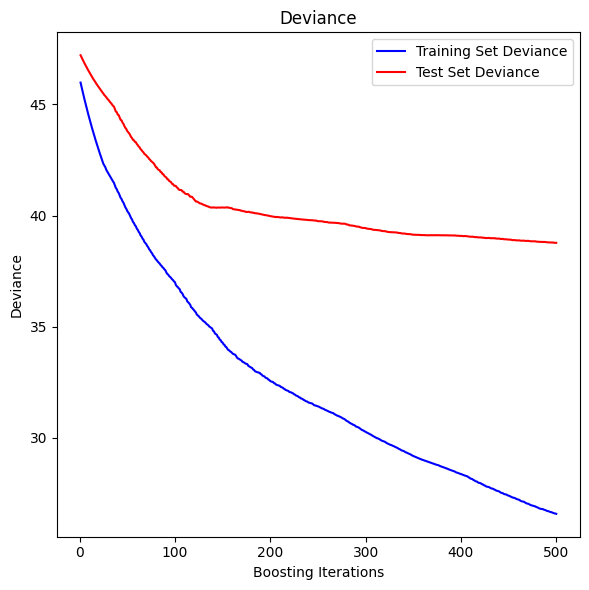

In [24]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(snow.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    snow.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(x=snow.predict(X_test),y=y_test);

##ADVANCED OPERATIONS(GridSearchCV)

###ESTIMATION PRECIPITATION

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_precip, y_precip)

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg=Ridge()
params={'alpha':[1,5,10,100]}
gs=GridSearchCV(reg,params,scoring='neg_mean_squared_error',cv=5,verbose=2)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 5, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007037,0.007161,0.001969,0.000049,1,{'alpha': 1},-39.926169,-41.789935,-34.348772,-62.414790,-39.968355,-43.689604,9.690239,1
1,0.003780,0.000025,0.001919,0.000007,5,{'alpha': 5},-39.927002,-41.789143,-34.347508,-62.414651,-39.970831,-43.689827,9.690205,2
2,0.004293,0.000995,0.002290,0.000631,10,{'alpha': 10},-39.928020,-41.788207,-34.345974,-62.414500,-39.974049,-43.690150,9.690153,3
3,0.004753,0.002479,0.001953,0.000014,100,{'alpha': 100},-39.942702,-41.778127,-34.324410,-62.414495,-40.025352,-43.697017,9.689663,4


In [28]:
print(gs.best_estimator_)

Ridge(alpha=1)


In [29]:
gs.best_estimator_.score(X_test,y_test)

0.039205186357503696

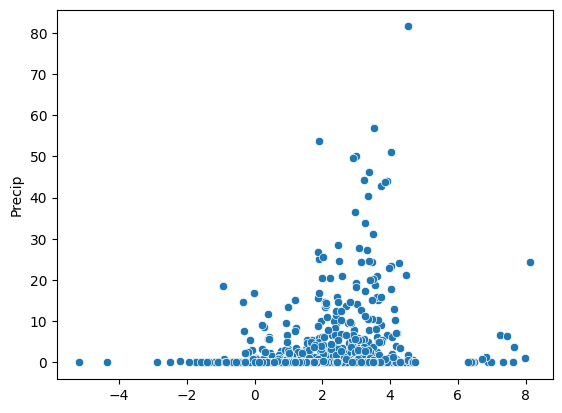

In [30]:
sns.scatterplot(x=gs.best_estimator_.predict(X_test),y=y_test);

###ADVANCE SNOWFALL ESTIMATION

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_snow, y_snow)

In [32]:
reg=Ridge()
params={'alpha':[1,5,10,100]}
gs=GridSearchCV(reg,params,scoring='neg_mean_squared_error',cv=5,verbose=2)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 5, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
print(gs.best_estimator_)

Ridge(alpha=100)


In [34]:
gs.best_estimator_.score(X_test,y_test)

0.2808773434884292

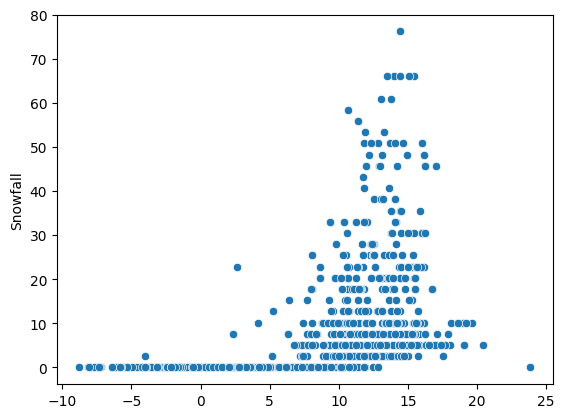

In [35]:
sns.scatterplot(x=gs.best_estimator_.predict(X_test),y=y_test);